# 描述性统计与可视化分析

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# 设置字体以增强可读性
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'Noto Sans CJK']  
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 加载数据
df = pd.read_excel('../data/train_20000.xlsx')

# 查看描述性统计
description = df.describe()
print(description)

                 id          季风强度          地形排水          河流管理          森林砍伐  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   5.242870e+05  4.921994e+00  4.926551e+00  4.954775e+00  4.942264e+00   
std    3.026977e+05  2.056183e+00  2.093638e+00  2.071778e+00  2.051735e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.621435e+05  3.000000e+00  3.000000e+00  4.000000e+00  4.000000e+00   
50%    5.242870e+05  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00   
75%    7.864305e+05  6.000000e+00  6.000000e+00  6.000000e+00  6.000000e+00   
max    1.048574e+06  1.600000e+01  1.800000e+01  1.600000e+01  1.700000e+01   

                城市化          气候变化          大坝质量            淤积          农业实践  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   4.942944e+00  4.934179e+00  4.955646e+00  4.926949e+00  4.942641e+00   
std    2.083140e+00  2.057920e+00  2.082146e+00  2.

In [38]:
# 检查缺失值
missing_values = df.isnull().sum()
# print(missing_values)

# 计算偏度和峰度
skewness = df[df.columns[1:21]].apply(skew)
kurtosis_values = df[df.columns[1:21]].apply(kurtosis)  # 默认偏度为 Fisher 实际偏度

# 打印结果
print("偏度:")
print(skewness)
print("\n峰度:")
print(kurtosis_values)

偏度:
季风强度      0.443775
地形排水      0.459312
河流管理      0.426512
森林砍伐      0.434045
城市化       0.441572
气候变化      0.429192
大坝质量      0.440933
淤积        0.448423
农业实践      0.419868
侵蚀        0.464098
无效防灾      0.443530
排水系统      0.441226
海岸脆弱性     0.441030
滑坡        0.425711
流域        0.450736
基础设施恶化    0.443632
人口得分      0.451967
湿地损失      0.437514
规划不足      0.455711
政策因素      0.437492
dtype: float64

峰度:
季风强度      0.339473
地形排水      0.240781
河流管理      0.225037
森林砍伐      0.274500
城市化       0.246507
气候变化      0.240898
大坝质量      0.259988
淤积        0.286048
农业实践      0.211416
侵蚀        0.268652
无效防灾      0.207012
排水系统      0.294194
海岸脆弱性     0.242321
滑坡        0.187350
流域        0.236981
基础设施恶化    0.245021
人口得分      0.254177
湿地损失      0.235229
规划不足      0.250263
政策因素      0.198630
dtype: float64


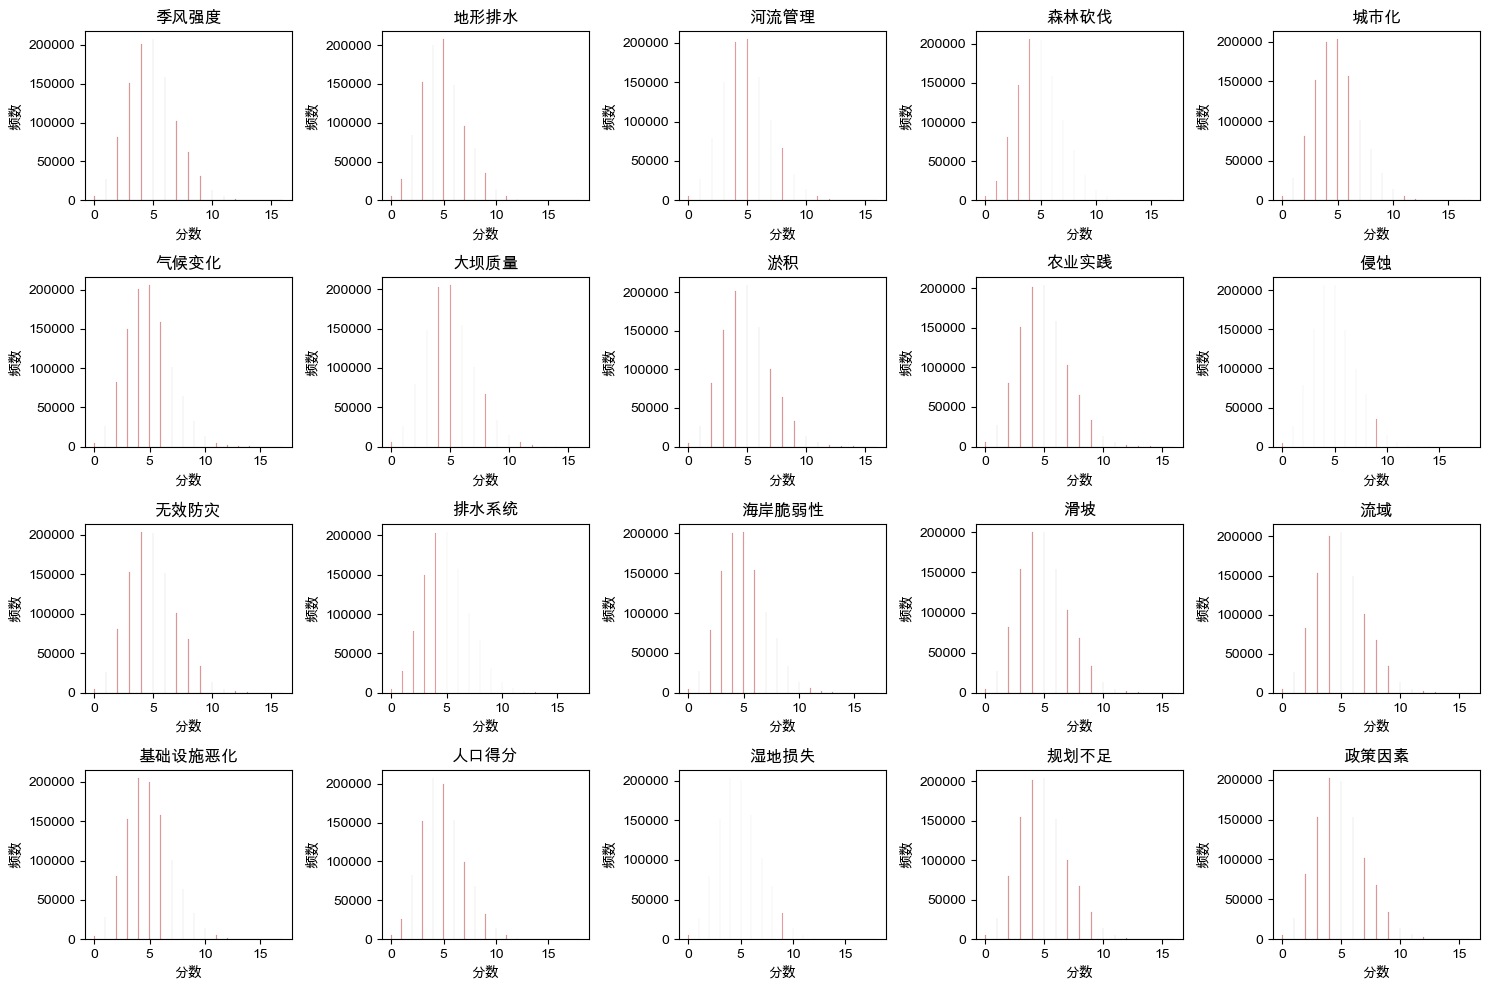

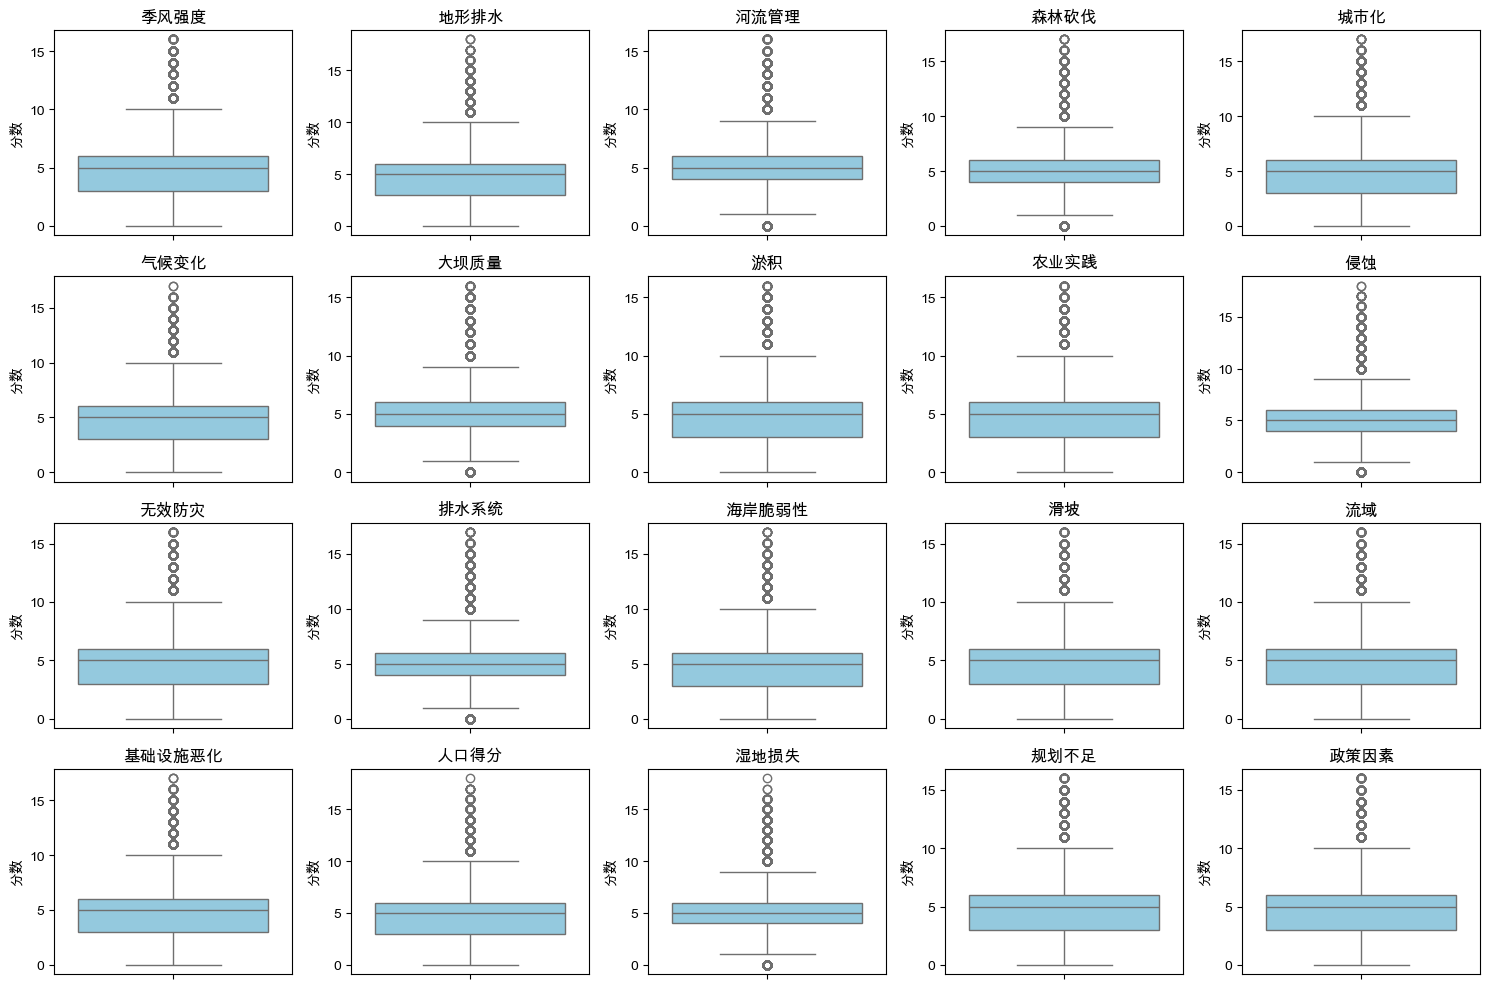

In [39]:
# 设置画布大小
plt.figure(figsize=(15, 10))

# 绘制直方图
for i, column in enumerate(df.columns[1:21], start=1):  # 跳过 'id' 列
    plt.subplot(4, 5, i)  # 根据列数决定子图结构
    sns.histplot(df[column], color='lightcoral')
    plt.title(column)
    plt.xlabel('分数')
    plt.ylabel('频数')
    
plt.tight_layout()
plt.savefig('../results/visualization/features_histplot.png', dpi=300)
plt.show()

# 设置画布大小
plt.figure(figsize=(15, 10))

# 绘制箱线图（有明确的大小关系，可视化时箱线图比饼图更加合适））
for i, column in enumerate(df.columns[1:21], start=1):  # 跳过 'id' 列
    plt.subplot(4, 5, i)  # 创建子图
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(column)
    plt.ylabel('分数')
    
plt.tight_layout()
plt.savefig('../results/visualization/features_boxplot.png', dpi=300)
plt.show()

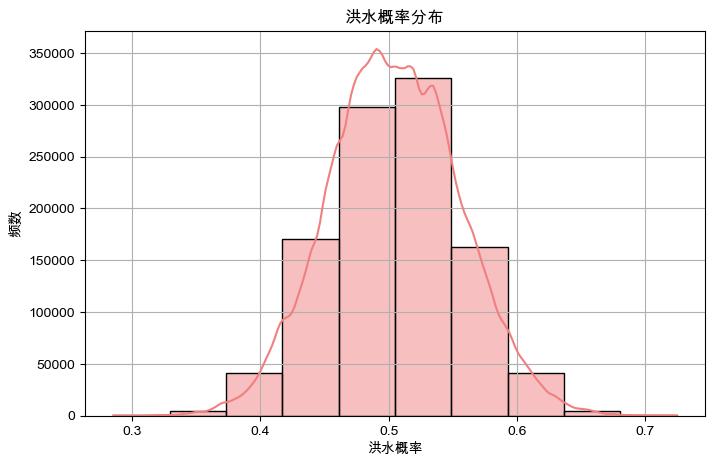

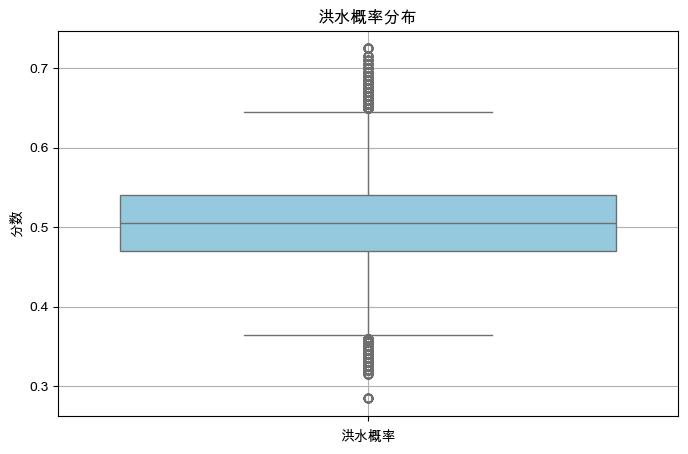

In [40]:
# 洪水概率直方图
plt.figure(figsize=(8, 5))
sns.histplot(df['洪水概率'], bins=10, kde=True, color='lightcoral')
plt.title('洪水概率分布')
plt.xlabel('洪水概率')
plt.ylabel('频数')
plt.grid()
plt.savefig('../results/visualization/flood_histplot.png', dpi=300)
plt.show()

# 洪水概率箱线图
plt.figure(figsize=(8, 5))
sns.boxplot(df['洪水概率'], color='skyblue')
plt.title('洪水概率分布')
plt.xlabel('洪水概率')
plt.ylabel('分数')
plt.grid()
plt.savefig('../results/visualization/flood_boxplot.png', dpi=300)
plt.show()

/var/folders/_n/v28ks4qd17x4p4q7qd22p9q9_qc92b/T/ipykernel_37893/2932732199.py:16: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='城市化', y=column, fill=True, cmap='Blues', thresh=0, alpha=0.4)


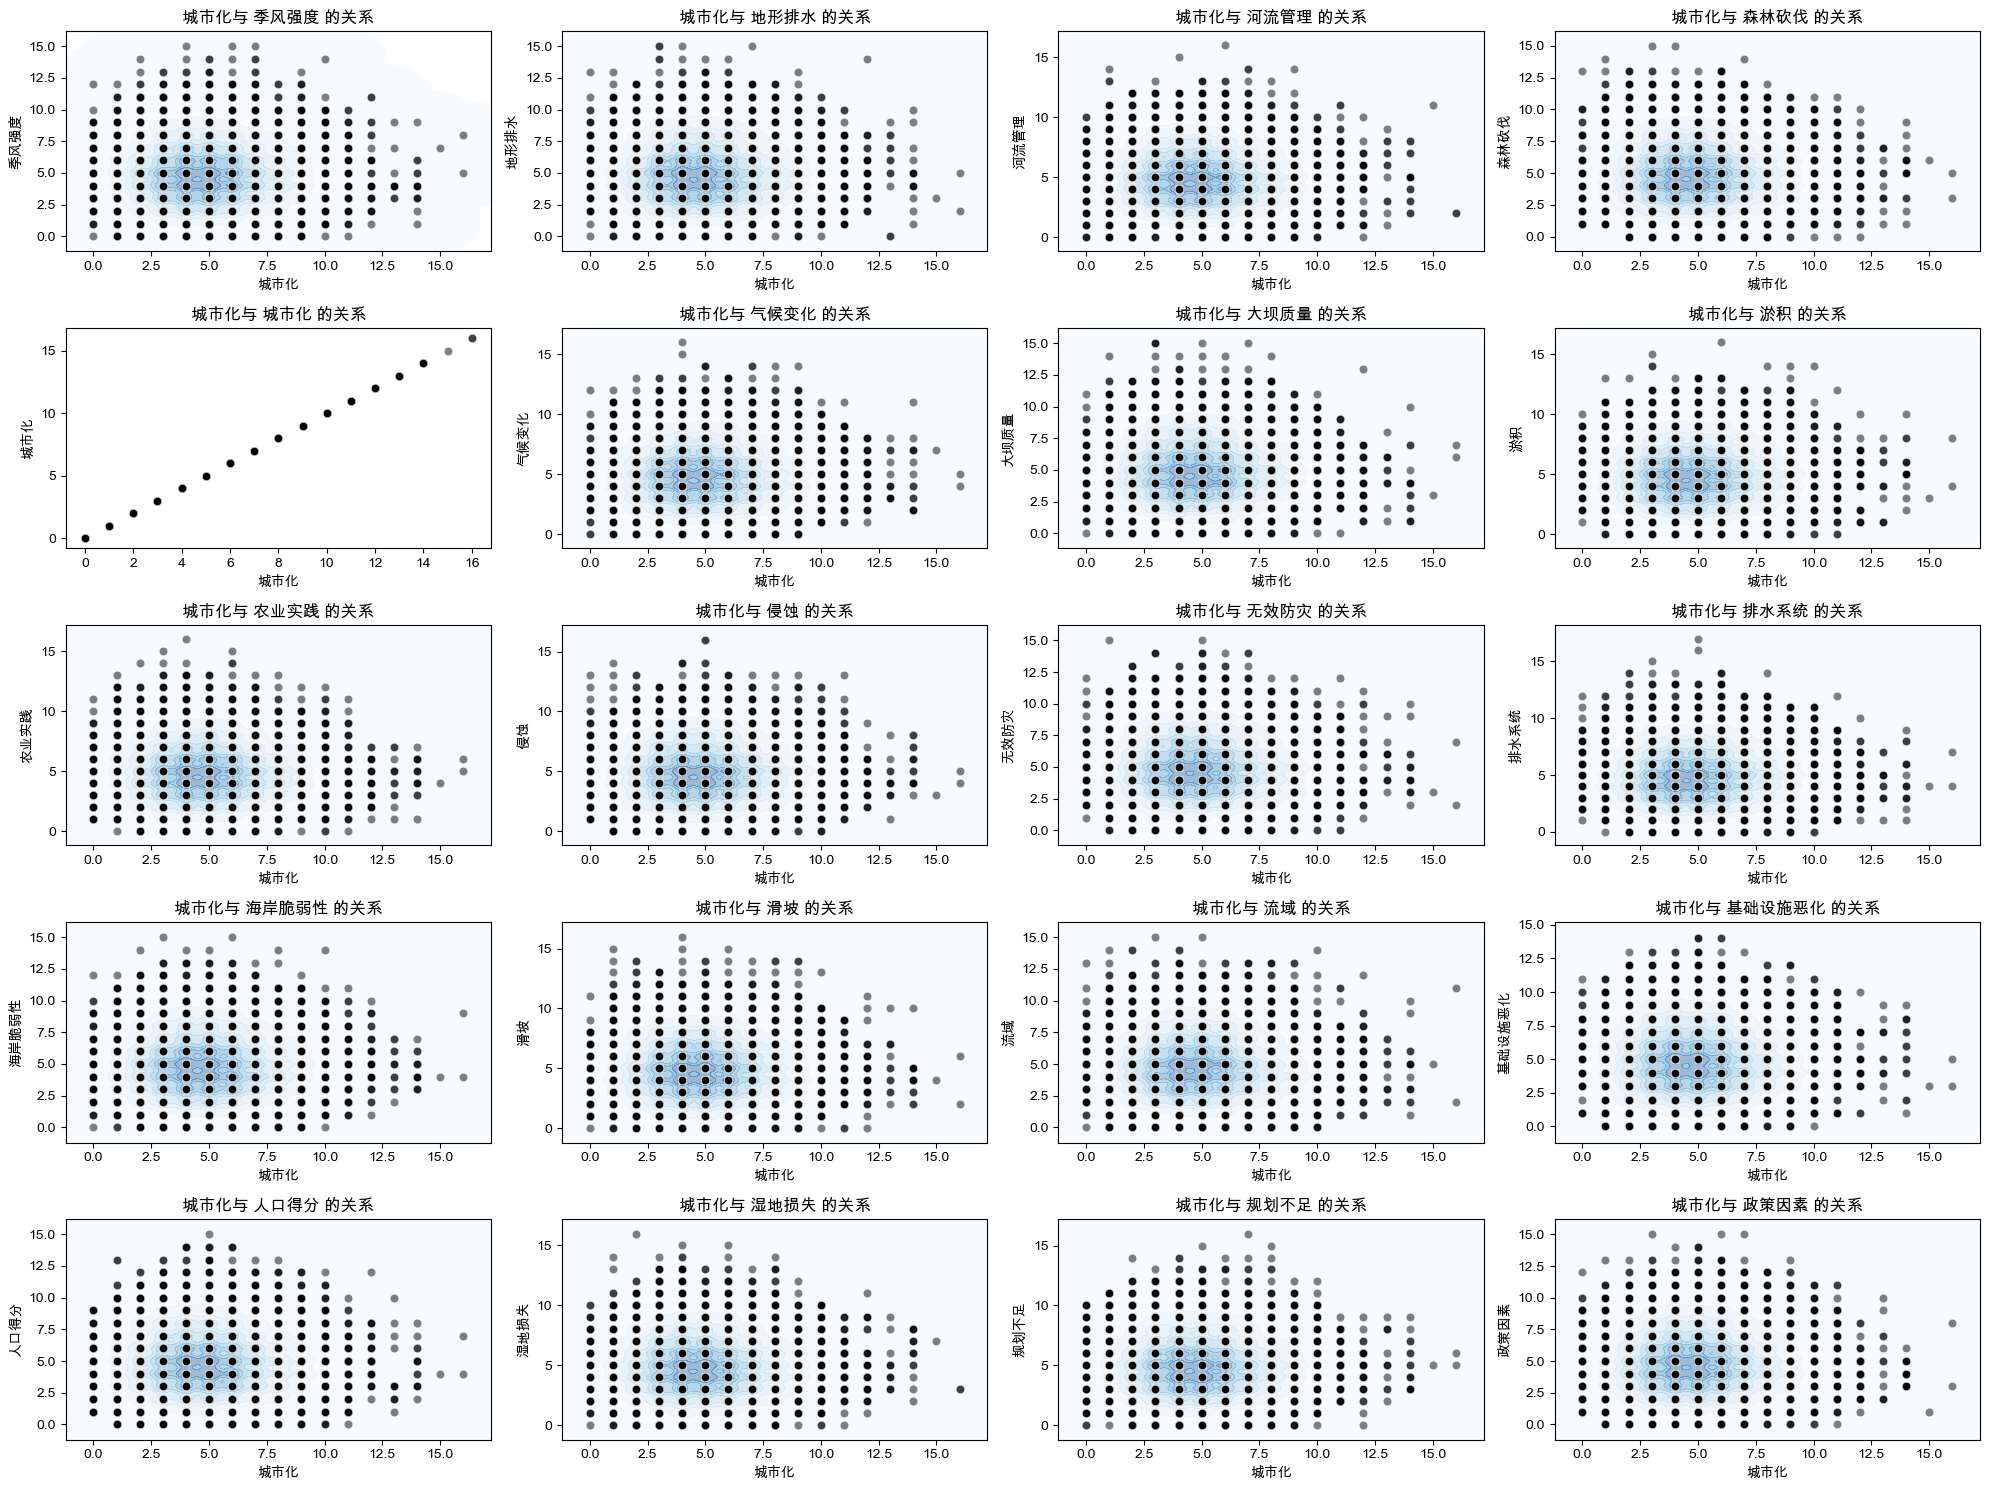

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 获取所有自变量（除去 'id' 列）
variables = df.columns[1:21]

# 设置画布
plt.figure(figsize=(20, 15))

# 绘制散点图与密度图
for i, column in enumerate(variables, start=1):
    plt.subplot(5, 4, i)  # 设置子图行列数
    
    # 绘制核密度估计图
    sns.kdeplot(data=df, x='城市化', y=column, fill=True, cmap='Blues', thresh=0, alpha=0.4)
    
    # 绘制散点图
    sns.scatterplot(x='城市化', y=column, data=df, color='black', alpha=0.5)
    
    plt.title(f'城市化与 {column} 的关系')
    plt.xlabel('城市化')
    plt.ylabel(column)

plt.tight_layout()
plt.savefig('../results/visualization/special_feature.png')
plt.show()


In [41]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 自变量（排除因变量和 ID 列）
X = df.iloc[:, :21].drop(columns=['id'])

# 计算 VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

   Feature       VIF
0     季风强度  6.351884
1     地形排水  6.161098
2     河流管理  6.325531
3     森林砍伐  6.395029
4      城市化  6.227794
5     气候变化  6.350398
6     大坝质量  6.276355
7       淤积  6.303114
8     农业实践  6.312807
9       侵蚀  6.232137
10    无效防灾  6.263220
11    排水系统  6.286575
12   海岸脆弱性  6.208233
13      滑坡  6.242176
14      流域  6.205725
15  基础设施恶化  6.318458
16    人口得分  6.252946
17    湿地损失  6.324182
18    规划不足  6.234556
19    政策因素  6.187665


In [34]:
# 根据城市化分组，计算其他特征的均值和标准差
grouped_df = df.groupby('城市化')['洪水概率'].agg(['mean', 'std', 'count']).reset_index()
print(grouped_df)

    城市化      mean       std  count
0     0  0.479330  0.052419     97
1     1  0.481087  0.051540    566
2     2  0.487498  0.047980   1503
3     3  0.496491  0.049142   2810
4     4  0.499532  0.050074   3848
5     5  0.505795  0.049617   3872
6     6  0.510421  0.050027   3075
7     7  0.515308  0.051533   1914
8     8  0.513948  0.049349   1193
9     9  0.517621  0.051756    683
10   10  0.523566  0.051234    279
11   11  0.520691  0.050159     94
12   12  0.525833  0.041585     36
13   13  0.545833  0.042256     12
14   14  0.540667  0.055770     15
15   15  0.550000       NaN      1
16   16  0.560000  0.021213      2


ANOVA F-statistic: 45.9008, P-value: 0.0000


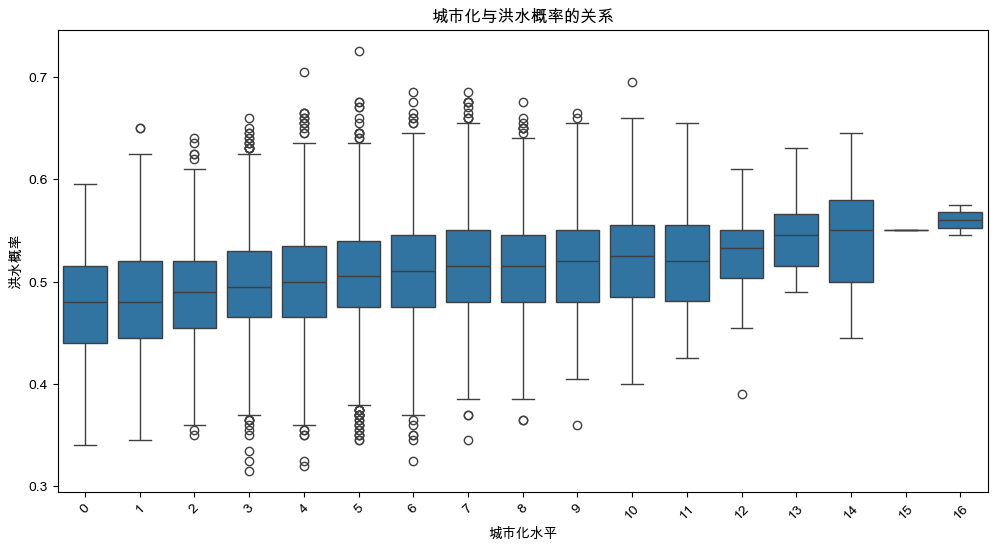

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0018    1.0 -0.0172 0.0207  False
     0      2   0.0082  0.981 -0.0099 0.0263  False
     0      3   0.0172 0.0747 -0.0007  0.035  False
     0      4   0.0202 0.0092  0.0025 0.0379   True
     0      5   0.0265    0.0  0.0087 0.0442   True
     0      6   0.0311    0.0  0.0133 0.0489   True
     0      7    0.036    0.0   0.018 0.0539   True
     0      8   0.0346    0.0  0.0164 0.0528   True
     0      9   0.0383    0.0  0.0196  0.057   True
     0     10   0.0442    0.0  0.0239 0.0646   True
     0     11   0.0414    0.0  0.0164 0.0663   True
     0     12   0.0465 0.0002  0.0128 0.0802   True
     0     13   0.0665 0.0016  0.0137 0.1193   True
     0     14   0.0613 0.0012  0.0134 0.1092   True
     0     15   0.0707 0.9935 -0.1028 0.2442  False
     0     16   0.0807 0.6823 -0.0426  0.204  False
     1      

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt

# 从Excel文件中读取数据
df = pd.read_excel('../data/train_20000.xlsx')  # 请根据您的文件路径进行修改

# 按城市化分组，提取洪水概率
groups = [group['洪水概率'].values for name, group in df.groupby('城市化')]

# 进行方差分析
f_statistic, p_value = f_oneway(*groups)
print(f'ANOVA F-statistic: {f_statistic:.4f}, P-value: {p_value:.4f}')

# 可视化结果
plt.figure(figsize=(12, 6))
sns.boxplot(x='城市化', y='洪水概率', data=df)
plt.title('城市化与洪水概率的关系')
plt.xlabel('城市化水平')
plt.ylabel('洪水概率')
plt.show()

# 事后检验
tukey_result = pairwise_tukeyhsd(df['洪水概率'], df['城市化'])
print(tukey_result)
